# **Understanding the bike sharing demand for company 'BoomBikes'** 

**Problem Statement**: BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. Company want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

     

1.   Which variables are significant in predicting the demand for shared bikes
2.   How well those variables describe the bike demands

.
    

## 1. Data understanding, preparation and EDA 
Data quality checks, Creation of need basis Dummy variables, Deriving new metrics, data conversion to  clean format

### 1.1 Import libraries and load dataset

In [4]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore') # This library will be used to ignore some warnings


In [5]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score
from sklearn import metrics


In [ ]:
from platform import python_version
print("python: ",python_version())
print("numpy: ",np.__version__) #numpy version
print("pandas: ",pd.__version__) #pandas version
print("matplotlib: ",matplotlib.__version__) #matplotlib version
print("seaborn: ",sns.__version__)
print("plotly: ",plotly.__version__)

In [7]:
# I have used google colab, commenting these connection line so that, local run to happen smoothly
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
bikes = pd.read_csv("/content/drive/MyDrive/ML/DataSets/day.csv")
# for local runs instead of google colab
bikes = pd.read_csv("day.csv")

### 1.2 Data understanding

In [9]:
bikes.shape

(730, 16)

In [10]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Observations:** 

1.   Season is categorical variable. As per data dictionary, season (1➡spring, 2➡summer, 3➡fall, 4➡winter). 
2.   Working day is another categorical variable. 0 ➡ weekend or holiday, 1 ➡ weekday (excluding holidays). We keep this field  as is.
3.   weekday is another categorical variable. :{0,6} are mapped to non working days. Hence Sunday ➡ 0, Saturday ➡ 6. 
4.   weathersit is another categorical variable. 
> - 1 ➡ Clear, Few clouds, Partly cloudy, Partly cloudy
> - 2 ➡ Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
> - 3 ➡ Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
> - 4 ➡ Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

5.   'dteday' is object data type, for date/time series to work, datatype should be converted to Date

6.   'yr' is holding 0 and 1 values. If we map these data with 'dteday', 0 ➡ 2018, 1 ➡ 2019; Let's keep these values as numerics


#### Based on above data, we might need to **convert season, weekday & weathersit** to textual values selective basis; dtedat must be converted to date type for better representation of plots. 




		
		





In [12]:
bikes.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Observation:** There  are no NA fields. 👍 🙂

### 1.3 Data cleaning and manipulation

instant is record index . Lets drop it

In [13]:
bikes.drop('instant', axis=1, inplace=True)  

In [14]:
bikes['dteday'] = pd.to_datetime(bikes['dteday'], format='%d-%m-%Y')

### 1.4 Data Analysis

In [15]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


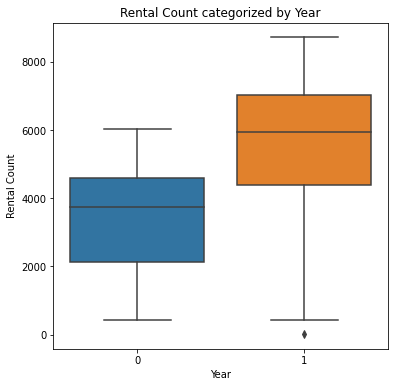

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="yr", y="cnt", data=bikes)
plt.xlabel("Year")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Year")
plt.show()

**Observation**: Number of customers increased in the latest year when compared with initial launched year.

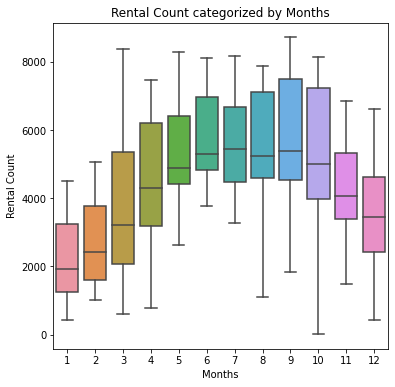

In [17]:
# plotting bike rental count categorized by months
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="mnth", y="cnt", data=bikes)
plt.xlabel("Months")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Months")
plt.show()

**Observation**: Less bikers during the months January, February, December 

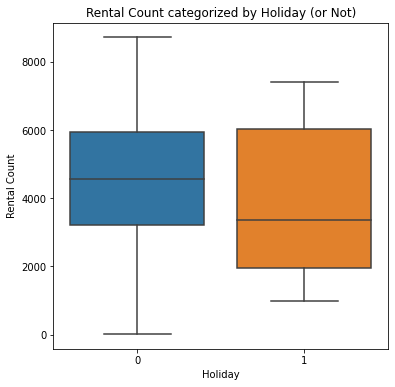

In [18]:
# plotting bike rental count categorized by whether the day is holiday or not (0: Not Holiday, 1: Is Holiday)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="holiday", y="cnt", data=bikes)
plt.xlabel("Holiday")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Holiday (or Not)")
plt.show()


**Observation**: Number of bikers are more on holidays

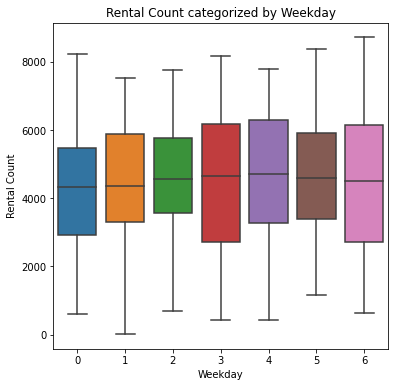

In [19]:
# plotting bike rental count categorized by weekday
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="weekday", y="cnt", data=bikes)
plt.xlabel("Weekday")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Weekday")
plt.show()


**Observation:** Bikers are spread across the weekdays. 

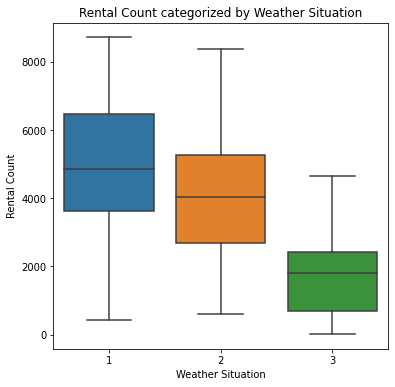

In [20]:
# plotting bike rental count categorized by weather situation (1: Clear, 2: Mist, 3: Snow)
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.boxplot(x="weathersit", y="cnt", data=bikes)
plt.xlabel("Weather Situation")
plt.ylabel("Rental Count")
plt.title("Rental Count categorized by Weather Situation")
plt.show()


**Weather Situation**: 1➡ clear or partly Cloudy, 2➡ Misty Clouds, 3➡light Rain Or Snow, 4➡ Heavy Rain Or Snow

**Observation**: Less bikers when weather is snowing

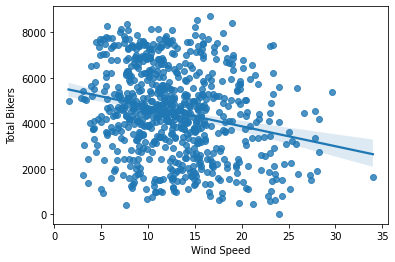

In [21]:
ax=sns.regplot(x='windspeed',y='cnt',data=bikes)
ax.set(xlabel='Wind Speed', ylabel='Total Bikers')
plt.show()

**Observation:** More bikers when the wind speed is 5-17

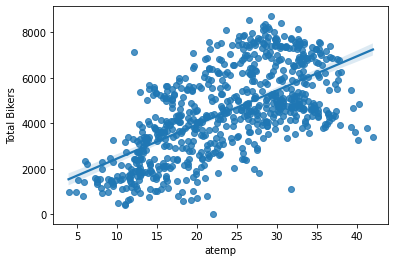

In [22]:
ax=sns.regplot(x='atemp',y='cnt',data=bikes)
ax.set(xlabel='atemp', ylabel='Total Bikers')
plt.show()

**Observation**: More Bikers when the feeling temperature is 12 to 35

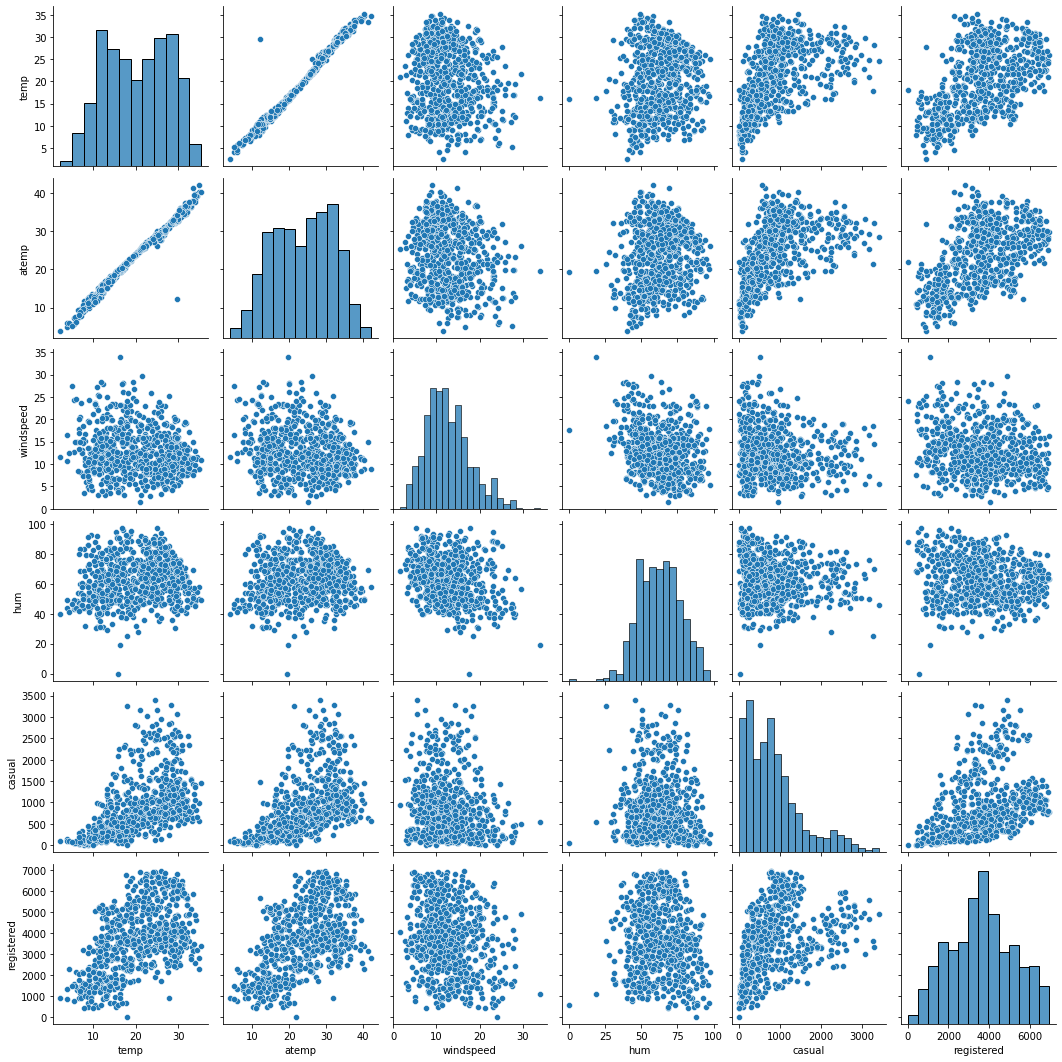

In [23]:
sns.pairplot(x_vars=['temp','atemp','windspeed','hum','casual','registered'],y_vars=['temp','atemp','windspeed','hum','casual','registered'],data=bikes)

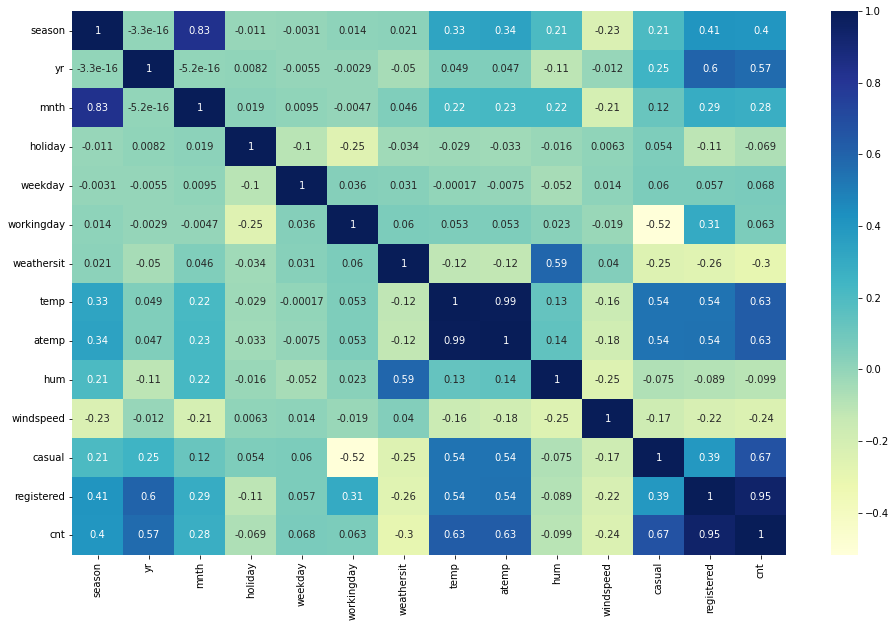

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(bikes.corr(), annot = True, cmap="YlGnBu")
plt.show()

**Observations:** 

We can clearly see that these are highly correlated {season, temp,cnt}. We can use multiple regression to find a linear equation that can best determine the value of dependent variable
$ Y=β_0 +β_1X_1 + β_2X_2 + ... $ 

When the model is built, one of the variables from each of these paris of variables might turn out to be redundant for the model.

In [25]:
#Dropping unnecessary columns
bikes.drop(['dteday','casual','registered','atemp'], axis=1, inplace=True)  

In [26]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


## 2. Data Preparation 

1.   Splitting the data into training and test sets
2.   Perform scaling
3.   Divide data into dependent and independent variables


### 2.1 Splitting the data into Training and Test sets

In [27]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
df_train.shape

(510, 11)

In [29]:
df_test.shape

(219, 11)

In [30]:
#set imported scaler to a variable
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except boolean values
num_vars = ['weathersit','temp','season','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
653,1.000000,1,10,0,2,1,0.0,0.509887,0.575354,0.300794,0.864243
576,0.666667,1,7,0,2,1,0.0,0.815169,0.725633,0.264686,0.827658
426,0.000000,1,3,0,6,0,0.5,0.442393,0.640189,0.255342,0.465255
728,0.000000,1,12,0,0,0,0.0,0.245101,0.498067,0.663106,0.204096
482,0.333333,1,4,0,6,0,0.5,0.395666,0.504508,0.188475,0.482973


In [33]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000
mean,0.505882,0.507843,6.549020,0.025490,2.990196,0.676471,0.20098,0.537262,0.650369,0.320768,0.513620
std,0.370649,0.500429,3.468714,0.157763,2.017093,0.468282,0.27377,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,3.000000,0.000000,1.000000,0.000000,0.00000,0.339853,0.538643,0.199179,0.356420
50%,0.666667,1.000000,7.000000,0.000000,3.000000,1.000000,0.00000,0.540519,0.653714,0.296763,0.518638
75%,0.666667,1.000000,10.000000,0.000000,5.000000,1.000000,0.50000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,12.000000,1.000000,6.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


#### Observations


*   mnth & season are highly correlated
*   temp & atemp are highly correlated

*   Our target variable 'cnt' is correalted with season & atemp







In [35]:
## Dividing into X and Y sets for model building
y_train = df_train.pop('cnt')
x_train = df_train

In [37]:
#performing train test split into 70-30 split
#df_train = bikes.drop(['dteday','casual','registered'], axis = 1)

In [41]:

#target = bikes.loc[:,'cnt']
#x_train, x_test, y_train, y_test = train_test_split(df_train, target, train_size = 0.7, test_size = 0.3, random_state = 42)



## 3. Model building and evaluation
Residual analysis is performed after model building and the assumptions are validated.

Model evaluation is done using the correct principles and appropriate evaluation metrics are chosen.

The results are on par with the best possible model on the dataset.

The model is interpreted and explained correctly. The commented code includes a brief explanation of the important variables and the model in simple terms.

### 3.1 Building a linear model

Fit a regression line through the training data using `statsmodels`. 

#### 3.1 Recursive feature elimination (RFE)

In [43]:
lm1 = LinearRegression()
lm1.fit(x_train, y_train)

rfe = RFE(lm1, n_features_to_select=14)            
rfe = rfe.fit(x_train, y_train)


In [44]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('season', True, 1),
 ('yr', True, 1),
 ('mnth', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]



In the list above, it is noticable that all columns where RFE support is true have equal scores of 1. This means that they could be considered useful features for the model. The usefulness may change throughout the model building progress. This is because RFE aims to remove the worst performing feature.


In [45]:
col = x_train.columns[rfe.support_]

In [46]:
# Creating X_train dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [47]:
# Adding a constant variable  
x_train_rfe = sm.add_constant(x_train_rfe)

In [48]:
# running the model
lm1 = sm.OLS(y_train,x_train_rfe).fit()

In [49]:
# show the detailed summary of the model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.84e-169
Time:                        16:39:39   Log-Likelihood:                 454.07
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     499   BIC:                            -839.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1875      0.032      5.826      0.0

In [50]:
# dropping mnth
x_train_new = x_train_rfe.drop(["mnth"], axis = 1)
# rebuilding the model without holiday
x_train_lm = sm.add_constant(x_train_new)
 # Running the linear model
lm1 = sm.OLS(y_train,x_train_lm).fit()  

# show the detailed summary of the model results
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     227.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.47e-170
Time:                        16:39:53   Log-Likelihood:                 453.85
No. Observations:                 510   AIC:                            -887.7
Df Residuals:                     500   BIC:                            -845.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1845      0.032      5.794      0.0

In [51]:
# dropping workingday
x_train_new = x_train_new.drop(["workingday"], axis = 1)
# rebuilding the model without workingday
x_train_lm = sm.add_constant(x_train_new)
 # Running the linear model
lm1 = sm.OLS(y_train,x_train_lm).fit()  

# show the detailed summary of the model results
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     254.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          6.16e-171
Time:                        16:40:05   Log-Likelihood:                 451.87
No. Observations:                 510   AIC:                            -885.7
Df Residuals:                     501   BIC:                            -847.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1985      0.031      6.374      0.0

### 3.2 Variance Inflation Factor ( VIF) : 
 
Looking at the correlations might not always be useful as it is possible that just one variable might not completely explain other variable. But some of the variables combined might be able to do that. 
 $ VIF_i = \frac{1}{1 - {R_i}^2} $

VIF basically explains the relationship of one independent variable with all the other independent variables.
*(source : upgrad Lecture notes)*

In [52]:
vif = pd.DataFrame()
vif['Features'] = x_train_lm.columns
vif['VIF'] = [variance_inflation_factor(x_train_lm.values, i) for i in range(x_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,48.81
7,hum,1.82
5,weathersit,1.65
6,temp,1.21
1,season,1.18
8,windspeed,1.17
2,yr,1.03
4,weekday,1.03
3,holiday,1.02


In [ ]:
# atemp can be dropped because of very high VIF

x_train_lm.drop(["const"], axis = 1, inplace=True)


In [34]:
x_train_lm.head()

,const,season,yr,holiday,weekday,weathersit,temp,hum,windspeed
653,1.0,1.000000,1,0,2,0.0,0.509887,0.575354,0.300794
576,1.0,0.666667,1,0,2,0.0,0.815169,0.725633,0.264686
426,1.0,0.000000,1,0,6,0.5,0.442393,0.640189,0.255342
728,1.0,0.000000,1,0,0,0.0,0.245101,0.498067,0.663106
482,1.0,0.333333,1,0,6,0.5,0.395666,0.504508,0.188475


3.3 Residual analysis of the training data

Residual Analysis

In [35]:
x_train_lm.shape

(510, 9)

In [53]:
# add constant to match dimensions between the data sets
x_train_lm2=sm.add_constant(x_train_lm)

In [54]:
# define y train pred data
y_train_pred = lm1.predict(x_train_lm)

Text(0.5, 0, 'Errors')

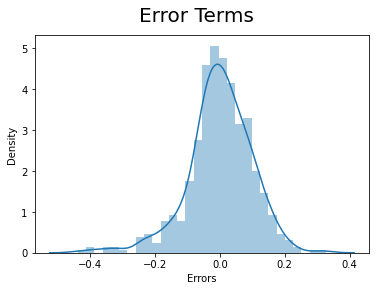

In [55]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors')     

**Observation**: Error Terms are normally distributed

### 3.4 Predictions

In [56]:
num_vars=['weathersit','temp','season','hum','windspeed','cnt']

In [57]:
df_test1=df_test

In [58]:
df_test1[num_vars]=scaler.transform(df_test1[num_vars])

In [59]:
df_test1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
184,0.666667,0,7,1,1,0,0.5,0.831783,0.657364,0.084219,0.692706
535,0.333333,1,6,0,3,1,0.0,0.901354,0.610133,0.153728,0.712034
299,1.000000,0,10,0,4,1,0.5,0.511964,0.837699,0.334206,0.303382
221,0.666667,0,8,0,3,1,0.0,0.881625,0.437098,0.339570,0.547400
152,0.333333,0,6,0,4,1,0.0,0.817246,0.314298,0.537414,0.569029


In [60]:
y_test =df_test1.pop('cnt')

In [61]:

x_test=df_test1
x_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.485540,0.479452,6.474886,0.036530,3.018265,0.698630,0.187215,0.558941,0.638508,0.313350
std,0.369821,0.500722,3.421875,0.188034,1.988415,0.459904,0.269422,0.233698,0.148974,0.159947
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808
25%,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.354650,0.527265,0.198517
50%,0.333333,0.000000,6.000000,0.000000,3.000000,1.000000,0.000000,0.558691,0.627737,0.299459
75%,0.666667,1.000000,9.000000,0.000000,5.000000,1.000000,0.500000,0.759096,0.743928,0.403048
max,1.000000,1.000000,12.000000,1.000000,6.000000,1.000000,1.000000,0.984424,1.002146,0.807474


In [62]:
x_train_lm3=sm.add_constant(x_train_lm)
x_train_lm3.columns

Index(['const', 'season', 'yr', 'holiday', 'weekday', 'weathersit', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [63]:
x_test_1=x_test[[ 'season', 'yr', 'holiday', 'weekday', 'weathersit', 'temp',
       'hum', 'windspeed']]

In [64]:
x_test_1=sm.add_constant(x_test_1)

In [65]:
x_test_1.head()

,const,season,yr,holiday,weekday,weathersit,temp,hum,windspeed
184,1.0,0.666667,0,1,1,0.5,0.831783,0.657364,0.084219
535,1.0,0.333333,1,0,3,0.0,0.901354,0.610133,0.153728
299,1.0,1.000000,0,0,4,0.5,0.511964,0.837699,0.334206
221,1.0,0.666667,0,0,3,0.0,0.881625,0.437098,0.339570
152,1.0,0.333333,0,0,4,0.0,0.817246,0.314298,0.537414


In [54]:
x_test_1.drop(["const"], axis = 1, inplace=True)

In [67]:
y_pred=lm1.predict(x_test_1)

In [68]:
y_test.shape

(219,)

In [69]:
x_test_1.shape

(219, 9)

In [70]:
y_pred.shape

(219,)

Text(0, 0.5, 'y_pred')

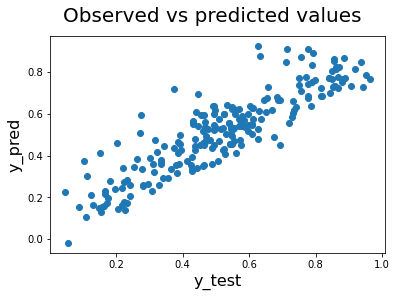

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('Observed vs predicted values', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=16)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

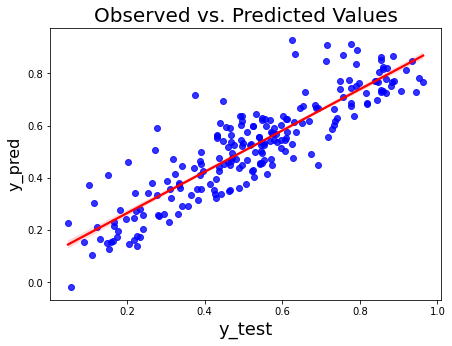

In [72]:
#Regression plot
plt.figure(figsize=(7,5))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.title('Observed vs. Predicted Values', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

### 4. R-squared for test set

In [73]:
r2_score(y_test, y_pred)

0.784120795209124

**Observation**: This means 78.4% of the variation in the dependent variable is predictable from the indepent variables

In [74]:
pd.DataFrame({'observed values':y_test, 'predicted values':y_pred})

,observed values,predicted values
184,0.692706,0.448343
535,0.712034,0.846247
299,0.303382,0.389206
221,0.547400,0.630172
152,0.569029,0.541151
...,...,...
400,0.336516,0.361613
702,0.757478,0.709482
127,0.495973,0.448529
640,0.868615,0.777304


**Observation**: Most of the predicted values or similar

In [75]:
durbin_watson(lm1.resid)

2.0039511887131183